# Setup

The goal here is to:
1. Setup your Anaconda virtual environment
2. Setup your project structure using cookiecutter
3. Run the code in this notebook

Once you have Anaconda installed, you should be able to use the following [command](https://conda.io/projects/conda/en/latest/commands.html) ([cheat sheet](https://docs.conda.io/projects/conda/en/4.6.0/_downloads/52a95608c49671267e40c689e0bc00ca/conda-cheatsheet.pdf)) to create your virtual environment (feel free to use your own environment name, i.e., change the value of "first-project"):
```sh
$ conda create --name first-project python=3.7 -y
```

Install the jupyter package so you can launch your own notebook (or run this one):
```sh
$ conda install jupyter
```
Note that Jupyter Notebook is included in the Anaconda 4.4+ distributions, so this may not be required.

Install the cookiecutter package that will enable you to create a data science organization for your project:
```sh
$ conda install -c conda-forge cookiecutter
```

Navigate to the directory in which you want your project to reside in and execute the following command:
```sh
$ cookiecutter https://github.com/drivendata/cookiecutter-data-science
```
Look at the README.md file in this project to get a sense of the project structure.

If you just want to download the notebook and ensure you have the requirements to run it, download requirements.txt and execute the following to install the packages:
```sh
$ conda install --file requirements.txt
```

# Exploratory Data Analysis

Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Import the dataset (mock dataset using [Mockaroo](https://mockaroo.com/)).

In [2]:
df = pd.read_csv('../data/raw/MOCK_DATA.csv')

Take a look at the first 10 records.

In [3]:
df.head(10)

,id,employee_id,first_name,last_name,date,401k_amount
0,1,807-98-3943,Clareta,Calan,2016-02-23,87785
1,2,681-81-9934,Jocko,Rickwood,2017-06-06,89401
2,3,458-68-7451,Isador,Mueller,2018-08-10,37494
3,4,369-89-1954,Karee,Boddy,2019-01-19,97488
4,5,200-46-4502,Bobette,Sentinella,2016-06-26,70841
5,6,259-92-6811,Meghann,Bosworth,2017-12-09,9599
6,7,417-81-0945,Damon,Thames,2016-10-30,88427
7,8,332-77-1326,Elfrida,Swash,2017-12-20,14628
8,9,846-52-2788,Grady,Nordass,2018-03-15,10026
9,10,579-35-9131,Lishe,Chavey,2018-02-28,91277


Create a column 'year' by pulling the first 4 characters of the 'date' field.

In [4]:
df['year'] = df['date'].str[:4]

In [5]:
df.head()

,id,employee_id,first_name,last_name,date,401k_amount,year
0,1,807-98-3943,Clareta,Calan,2016-02-23,87785,2016
1,2,681-81-9934,Jocko,Rickwood,2017-06-06,89401,2017
2,3,458-68-7451,Isador,Mueller,2018-08-10,37494,2018
3,4,369-89-1954,Karee,Boddy,2019-01-19,97488,2019
4,5,200-46-4502,Bobette,Sentinella,2016-06-26,70841,2016


Summarize the numeric values in the dataframe.

In [6]:
df.describe()

,id,401k_amount
count,1000.000000,1000.000000
mean,500.500000,49657.559000
std,288.819436,29168.729906
min,1.000000,40.000000
25%,250.750000,24572.250000
50%,500.500000,50629.000000
75%,750.250000,74877.750000
max,1000.000000,99936.000000


Take a look at the distribution of 401k amounts by month.

In [7]:
df['month'] = pd.to_datetime(df['date']).dt.strftime('%b')

In [8]:
df.head()

,id,employee_id,first_name,last_name,date,401k_amount,year,month
0,1,807-98-3943,Clareta,Calan,2016-02-23,87785,2016,Feb
1,2,681-81-9934,Jocko,Rickwood,2017-06-06,89401,2017,Jun
2,3,458-68-7451,Isador,Mueller,2018-08-10,37494,2018,Aug
3,4,369-89-1954,Karee,Boddy,2019-01-19,97488,2019,Jan
4,5,200-46-4502,Bobette,Sentinella,2016-06-26,70841,2016,Jun


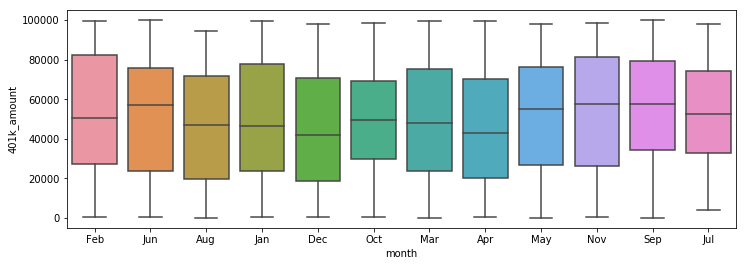

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
sns.boxplot(x='month',y='401k_amount',data=df,ax=ax)
plt.show()